## Merge all prepocessed data to start analysis


In [1]:
# connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import necessary libraries
import pandas as pd
import glob
import os

path = '/content/drive/MyDrive/2022.05.24_Final-Project_Shared-Folder/classified/reviewed'

# use glob to get all the csv files in the folder
csv_files = glob.glob(os.path.join(path, "*.csv"))
    
# loop over the list of csv files
df_files = (pd.read_csv(f) for f in csv_files)
# concat to one dataframe
df = pd.concat(df_files, ignore_index=True)
# reset the index of final DataFrame
df.reset_index(inplace = True, drop = True)
# drop columns not important for the analysis
df.drop(['Unnamed: 0', 'review', 'classification_title'], axis = 1, inplace = True)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           725 non-null    object
 1   country         725 non-null    object
 2   summary         725 non-null    object
 3   classification  725 non-null    object
 4   language        725 non-null    object
 5   topic           725 non-null    object
 6   link            725 non-null    object
 7   published_date  725 non-null    object
dtypes: object(8)
memory usage: 45.4+ KB
None


In [4]:
# make classification also numerical
df['classification_num'] = df['classification'].apply(lambda x: 1 if x == 'POSITIVE' else 0)
# drop countries where there are to few results
df = df.drop(df[((df.country == "unknown") | (df.country == "GB") | (df.country == "SG")| (df.country == "IS") |(df.country == "Syria") | (df.country == "SA") | (df.country == "SY") | (df.country == "VI"))].index)
# fix country names
df["country"] = df["country"].apply(lambda x: "AE" if x == 'UAE' else x)
df["country"] = df["country"].apply(lambda x: "EG" if x == 'Egypt' else x)
# drop duplicates if there are any
df.drop_duplicates(inplace = True)
# display info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689 entries, 0 to 723
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               689 non-null    object
 1   country             689 non-null    object
 2   summary             689 non-null    object
 3   classification      689 non-null    object
 4   language            689 non-null    object
 5   topic               689 non-null    object
 6   link                689 non-null    object
 7   published_date      689 non-null    object
 8   classification_num  689 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 53.8+ KB


In [196]:
# save dataframe to csv
df.to_csv(f"/content/drive/MyDrive/2022.05.24_Final-Project_Shared-Folder/final_dataset.csv")

## Do some basic analytics

main analysis should be done in Tablou though, to practise that tool as well

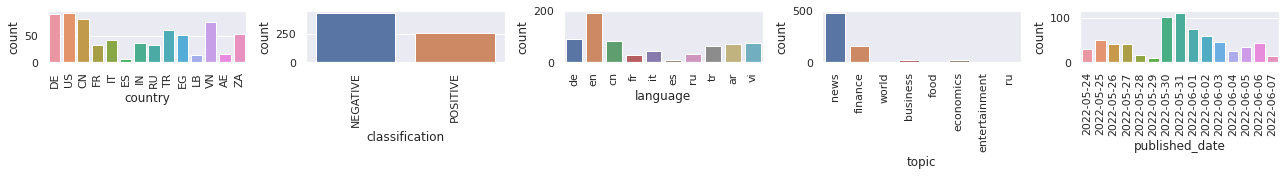

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# exclude some columns first
plot_df = df.drop(['link', 'summary', 'title', 'classification_num'], axis = 1)

# trim the publishing date 
#plot_df['published_date'] = pd.to_datetime(df['published_date']).dt.normalize() # this one keeps the time but sets it to 00:00:00
plot_df['published_date'] = pd.to_datetime(plot_df['published_date']).dt.date
plot_df.sort_values(by='published_date', inplace=True)

fig = plt.figure(figsize=(18,20))
for index in range(len(plot_df.columns)):
    plt.subplot(9,5,index+1)
    sns.countplot(x=plot_df.iloc[:,index], data=plot_df.dropna())
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

In [6]:
gf = df[["classification", "country", "title"]].groupby(["country", "classification"]).count()
gf

title
country classification       
AE      NEGATIVE           13
        POSITIVE            2
CN      NEGATIVE           49
        POSITIVE           33
DE      NEGATIVE           38
        POSITIVE           53
EG      NEGATIVE           44
        POSITIVE            7
ES      NEGATIVE            4
        POSITIVE            3
FR      NEGATIVE           20
        POSITIVE           13
IN      NEGATIVE           20
        POSITIVE           17
IT      NEGATIVE           32
        POSITIVE           11
LB      NEGATIVE            7
        POSITIVE            7
RU      NEGATIVE           24
        POSITIVE            8
TR      NEGATIVE           50
        POSITIVE           12
US      NEGATIVE           58
        POSITIVE           35
VN      NEGATIVE           60
        POSITIVE           16
ZA      NEGATIVE           15
        POSITIVE           38

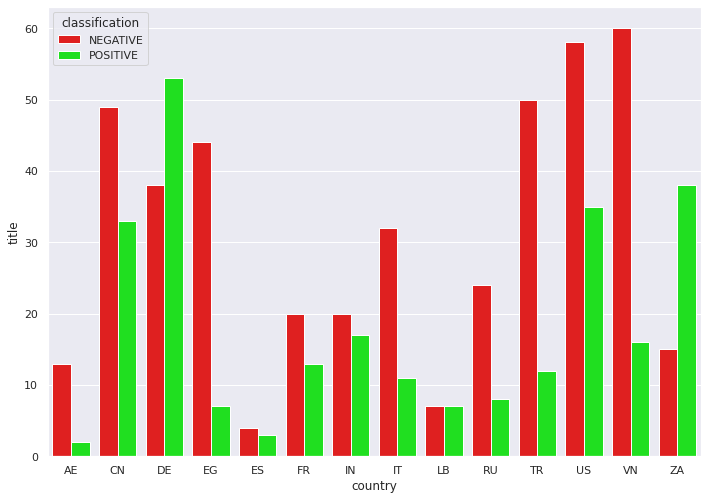

In [7]:
# need reset_index() so values can be ploted 
new = df[["classification", "country","title"]].groupby(["country", "classification"]).count().reset_index()

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x='country',y='title',hue='classification',data=new, palette=["#FF0000", "#00FF00"])


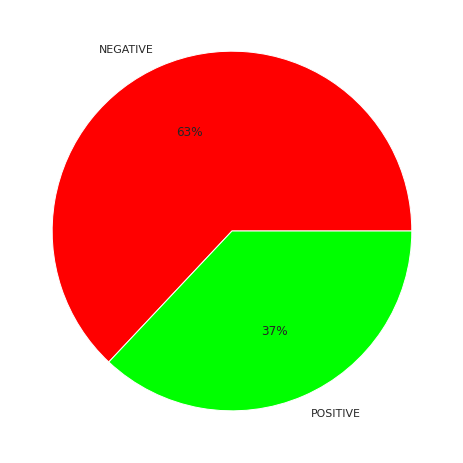

In [23]:
#define data
data = df.classification.value_counts()
labels = ["NEGATIVE", "POSITIVE"]

#define Seaborn color palette to use
colors = ["#FF0000", "#00FF00"]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()